In [20]:
using Distributions, Plots, JuMP, Gurobi

In [83]:
lambda = 2000
mu = 200

m=rand(Poisson(lambda))
n=rand(Poisson(mu))

x = [rand(Uniform(),2) for i=1:m]
y = [rand(Uniform(),2)  for i=1:n]

198-element Vector{Vector{Float64}}:
 [0.48781769806124586, 0.283798532429026]
 [0.778569639294836, 0.07756576983913832]
 [0.9032296206048984, 0.1390972917557296]
 [0.8978913922309486, 0.9256507832497809]
 [0.4416374638497449, 0.3933263246431642]
 [0.480028497328592, 0.7098146534729373]
 [0.29700066492383104, 0.08738356262839564]
 [0.9333646459062337, 0.6616947785819114]
 [0.9011504155714578, 0.8849128675884113]
 [0.3500584520570009, 0.2568677010762612]
 [0.6688195143193869, 0.9418751260487346]
 [0.25445962359291663, 0.22726099803770006]
 [0.02166507420978614, 0.3692190321508686]
 ⋮
 [0.8061418495765054, 0.7750205785432773]
 [0.23940280053522023, 0.24880280061961657]
 [0.4512745560241618, 0.19402705335909531]
 [0.2414985312686042, 0.6282180614008015]
 [0.7949242333321385, 0.0859427054860713]
 [0.2544477291871956, 0.6615337550214535]
 [0.9853725883825877, 0.9463117941089347]
 [0.0432261619100307, 0.8982359859628788]
 [0.3990875208517739, 0.5295265603465837]
 [0.0786251889451135, 0.86583

In [84]:
d(x,y) = sqrt(sum((x-y).^2))

d (generic function with 1 method)

In [85]:
W = [d(x[i],y[j]) for i=1:m,j=1:n]

2011×198 Matrix{Float64}:
 0.040052   0.336224  0.429869   0.796468   …  0.743747   0.658958   0.620214
 0.420851   0.773321  0.860087   0.925384      0.413676   0.505314   0.290546
 0.628703   0.858665  0.841808   0.337293      0.484282   0.205624   0.472656
 0.347003   0.533253  0.52316    0.417911      0.627632   0.413037   0.546714
 0.0919975  0.308454  0.414518   0.83849       0.790659   0.710969   0.665913
 0.743058   0.797561  0.716511   0.09939    …  0.887066   0.610458   0.854472
 0.707725   1.04854   1.09161    0.805475      0.0167455  0.262651   0.131226
 0.268749   0.550158  0.576996   0.545331      0.525619   0.367035   0.427162
 0.403719   0.20596   0.112331   0.675028      1.01835    0.832783   0.915564
 0.422961   0.496777  0.448109   0.366211      0.773949   0.540911   0.697985
 0.422493   0.77257   0.862321   0.9445     …  0.433553   0.527957   0.311535
 0.604637   0.64038   0.562183   0.22652       0.862913   0.599892   0.808488
 0.739392   0.775919  0.689931   0.140

In [86]:
model = Model(Gurobi.Optimizer)

@variable(model, pi[1:m,1:n]>=0)
@constraint(model,sum(pi,dims=2).==1)

@objective(model,Min, sum(W.*pi))

optimize!(model)

Academic license - for non-commercial use only - expires 2021-09-10
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2011 rows, 398178 columns and 398178 nonzeros
Model fingerprint: 0xa8d4ed44
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 2011 rows and 398178 columns
Presolve time: 0.40s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.4771217e+01   0.000000e+00   0.000000e+00      0s

Solved with dual simplex
Solved in 0 iterations and 0.48 seconds
Optimal objective  7.477121681e+01

User-callback calls 33, time in user-callback 0.00 sec


In [87]:
vpi = value.(pi)

asignacion = [findmax(vpi[i,:])[2] for i=1:m]

2011-element Vector{Int64}:
  62
  14
 163
  36
  40
 108
 196
  16
 174
 164
  14
 117
 108
   ⋮
  36
  15
  88
  80
  34
  23
  14
  29
  99
   3
   4
 178

In [88]:
function plotear(x,y,asignacion)
    
    p=plot()
    
    scatter!([u[1] for u in x], [u[2] for u in x], color=:blue , label=:none)
    scatter!([u[1] for u in y], [u[2] for u in y], color=:red, label=:none)
    
    for i=1:length(x)
        plot!( [x[i][1], y[asignacion[i]][1] ] , [x[i][2], y[asignacion[i]][2] ], label=:none, color=:gray)
    end
    p
end
        

plotear (generic function with 1 method)

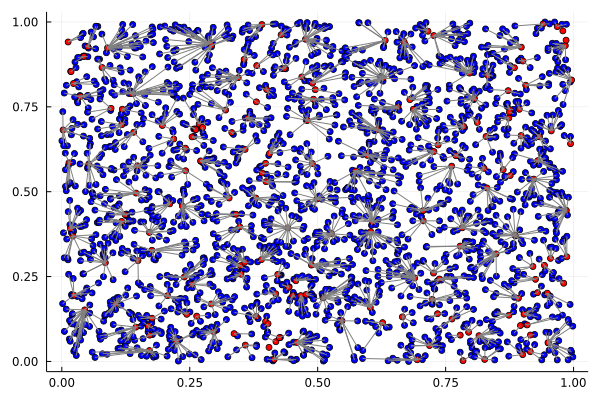

In [89]:
plotear(x,y,asignacion)

In [90]:
N = [sum(asignacion.==j) for j=1:n]

198-element Vector{Int64}:
 21
  2
  7
 11
 20
 14
 15
 10
  5
 11
 17
 11
  9
  ⋮
 16
 16
  6
  7
  5
  4
  0
  6
  9
  9
  7
  5

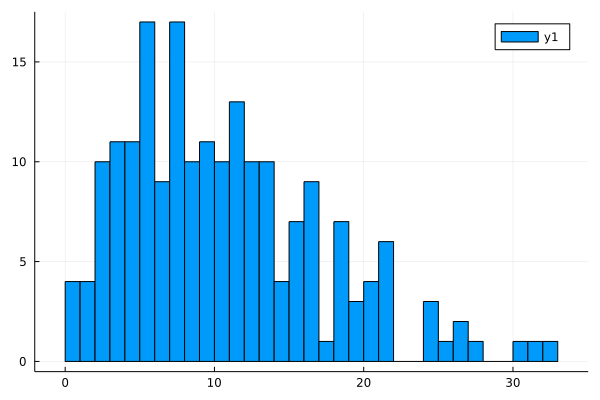

In [91]:
using StatsBase
h = fit(Histogram, N, nbins=maximum(N))

plot(h)

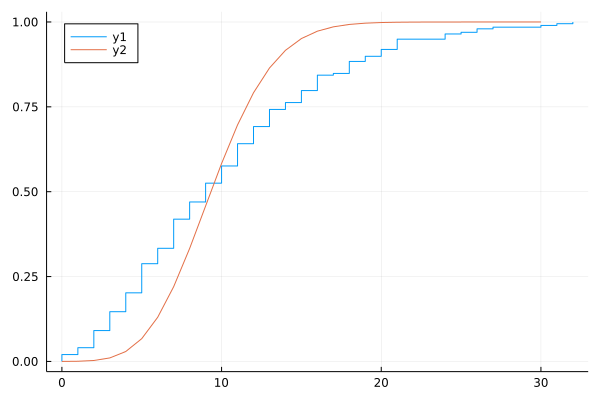

In [93]:
plot(ecdf(N))
plot!((0:30), cdf.(Poisson(lambda/mu),0:30))